# Exploraaaaaaaaaaation #

In [1]:
from collections import Counter

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib import pylab

import pandas as pd
import seaborn as sns
import numpy as np

import json
from ast import literal_eval  # OP = OP, NP = P (by Articuno's Law)

%matplotlib inline

In [2]:
#datapath = 'data/'

In [3]:
plt.style.use('default')

In [4]:
# https://stackoverflow.com/questions/6963035/pyplot-axes-labels-for-subplots
def suplabel(axis,label,label_prop=None,labelpad=3,ha='center',va='center'):
    ''' Add super ylabel or xlabel to the figure
    Similar to matplotlib.suptitle
    axis       - string: "x" or "y"
    label      - string
    label_prop - keyword dictionary for Text
    labelpad   - padding from the axis (default: 5)
    ha         - horizontal alignment (default: "center")
    va         - vertical alignment (default: "center")
    '''
    fig = pylab.gcf()
    xmin = []
    ymin = []
    for ax in fig.axes:
        xmin.append(ax.get_position().xmin)
        ymin.append(ax.get_position().ymin)
    xmin,ymin = min(xmin),min(ymin)
    dpi = fig.dpi
    if axis.lower() == "y":
        rotation=90.
        x = xmin-float(labelpad)/dpi
        y = 0.5
    elif axis.lower() == 'x':
        rotation = 0.
        x = 0.5
        y = ymin - float(labelpad+1.5)/dpi
    else:
        raise Exception("Unexpected axis: x or y")
    if label_prop is None: 
        label_prop = dict()
    pylab.text(x,y,label,rotation=rotation,transform=fig.transFigure,ha=ha,va=va,**label_prop)

## Loading Recipes ##

In [5]:
#filename = 'RAW_recipes.csv'

In [6]:
#df_recipes = pd.read_csv(datapath + filename, index_col='id')

In [7]:
#df_recipes['submitted'] = df_recipes['submitted'].astype('datetime64')

In [8]:
#for col in ['nutrition', 'tags', 'ingredients', 'steps']:
#    df_recipes[col] = df_recipes[col].apply(lambda x: literal_eval(x))

In [9]:
#df_recipes = df_recipes[df_recipes['minutes'] < 300]

## Loading Interactions ##

In [10]:
#filename = 'RAW_interactions.csv'

In [11]:
#df_inter = pd.read_csv(datapath + filename)

In [12]:
#df_inter['date'] = df_inter['date'].astype('datetime64')

## Avg rating, n votes and std ##

In [13]:
#data = [[i, df_sub.shape[0], df_sub.rating.mean(), df_sub.rating.std()] for i, df_sub in df_inter.groupby('recipe_id')]
#df_inter_recipe = pd.DataFrame(data, columns=['recipe_id', 'n_votes', 'avg_rating', 'std_rating'])

In [14]:
#df_inter_recipe = df_inter_recipe.set_index('recipe_id')

In [15]:
#df_inter_recipe

In [16]:
#df = df_recipes.join(df_inter_recipe)
#df.std_rating = df.std_rating.fillna(0)

In [17]:
#df

In [18]:
#df.describe()

In [19]:
#plot = sns.pairplot(df[['minutes', 'n_steps', 'n_ingredients', 'n_votes', 'avg_rating', 'std_rating']])
#plot.savefig('imgs/pairplot_recipes.png')

In [20]:
#with open('data/recipes.json', 'w') as f:
#    df.to_json(f, date_format='')

In [21]:
df = pd.read_json('data/recipes.json')

In [22]:
df.submitted = df.submitted.astype('datetime64')

## Things we don't want

In [23]:
# Recipes which take more than 5 hours
df = df[df['minutes'] < 300]

In [24]:
# We don't want oven or dessert recipes
index = df.tags.to_numpy()
f = lambda x: ('desserts' not in x and 'oven' not in x)
index = [f(x) for x in index]
df = df[index]

In [25]:
df

,name,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients,n_votes,avg_rating,std_rating
137739,arriba baked winter squash mexican style,55,47892,2005-09-16,"[60-minutes-or-less, time-to-make, course, mai...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"[make a choice and proceed with recipe, depend...",autumn is my favorite time of year to cook! th...,"[winter squash, mexican seasoning, mixed spice...",7,3,5.0,0.0
112140,all in the kitchen chili,130,196586,2005-02-25,"[time-to-make, course, preparation, main-dish,...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"[brown ground beef in large pot, add chopped o...",this modified version of 'mom's' chili was a h...,"[ground beef, yellow onions, diced tomatoes, t...",13,1,4.0,0.0
44061,amish tomato ketchup for canning,190,41706,2002-10-25,"[weeknight, time-to-make, course, main-ingredi...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,"[mix all ingredients& boil for 2 1 / 2 hours ,...",my dh's amish mother raised him on this recipe...,"[tomato juice, apple cider vinegar, sugar, sal...",8,1,5.0,0.0
5289,apple a day milk shake,0,1533,1999-12-06,"[15-minutes-or-less, time-to-make, course, mai...","[160.2, 10.0, 55.0, 3.0, 9.0, 20.0, 7.0]",4,"[combine ingredients in blender, cover and ble...",None,"[milk, vanilla ice cream, frozen apple juice c...",4,2,5.0,0.0
25274,aww marinated olives,15,21730,2002-04-14,"[15-minutes-or-less, time-to-make, course, mai...","[380.7, 53.0, 7.0, 24.0, 6.0, 24.0, 6.0]",4,[toast the fennel seeds and lightly crush them...,my italian mil was thoroughly impressed by my ...,"[fennel seeds, green olives, ripe olives, garl...",9,1,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
357451,zydeco sauce,15,461283,2009-02-23,"[15-minutes-or-less, time-to-make, course, cui...","[239.9, 30.0, 19.0, 22.0, 1.0, 14.0, 5.0]",3,"[to make the sauce , combine the mayonnaise , ...",great sauce for cheeseburgers or dipping fries...,"[mayonnaise, prepared horseradish, worcestersh...",6,2,5.0,0.0
188810,zydeco shrimp wrap,57,37779,2006-10-03,"[60-minutes-or-less, time-to-make, course, mai...","[482.6, 13.0, 25.0, 37.0, 33.0, 9.0, 27.0]",14,"[bring 3 quarts salted to water to a boil, add...",a wrap inspired by great cajun flavors,"[white rice, vegetable oil, onion, green bell ...",11,1,3.0,0.0
486161,zydeco soup,60,227978,2012-08-29,"[ham, 60-minutes-or-less, time-to-make, course...","[415.2, 26.0, 34.0, 26.0, 44.0, 21.0, 15.0]",7,"[heat oil in a 4-quart dutch oven, add celery ...",this is a delicious soup that i originally fou...,"[celery, onion, green sweet pepper, garlic clo...",22,6,5.0,0.0
493372,zydeco spice mix,5,1500678,2013-01-09,"[15-minutes-or-less, time-to-make, course, pre...","[14.8, 0.0, 2.0, 58.0, 1.0, 0.0, 1.0]",1,[mix all ingredients together thoroughly],this spice mix will make your taste buds dance!,"[paprika, salt, garlic powder, onion powder, d...",13,1,5.0,0.0


## Tag Analysis ##

In [26]:
df['tag_n'] = df['tags'].apply(lambda x:len(x))

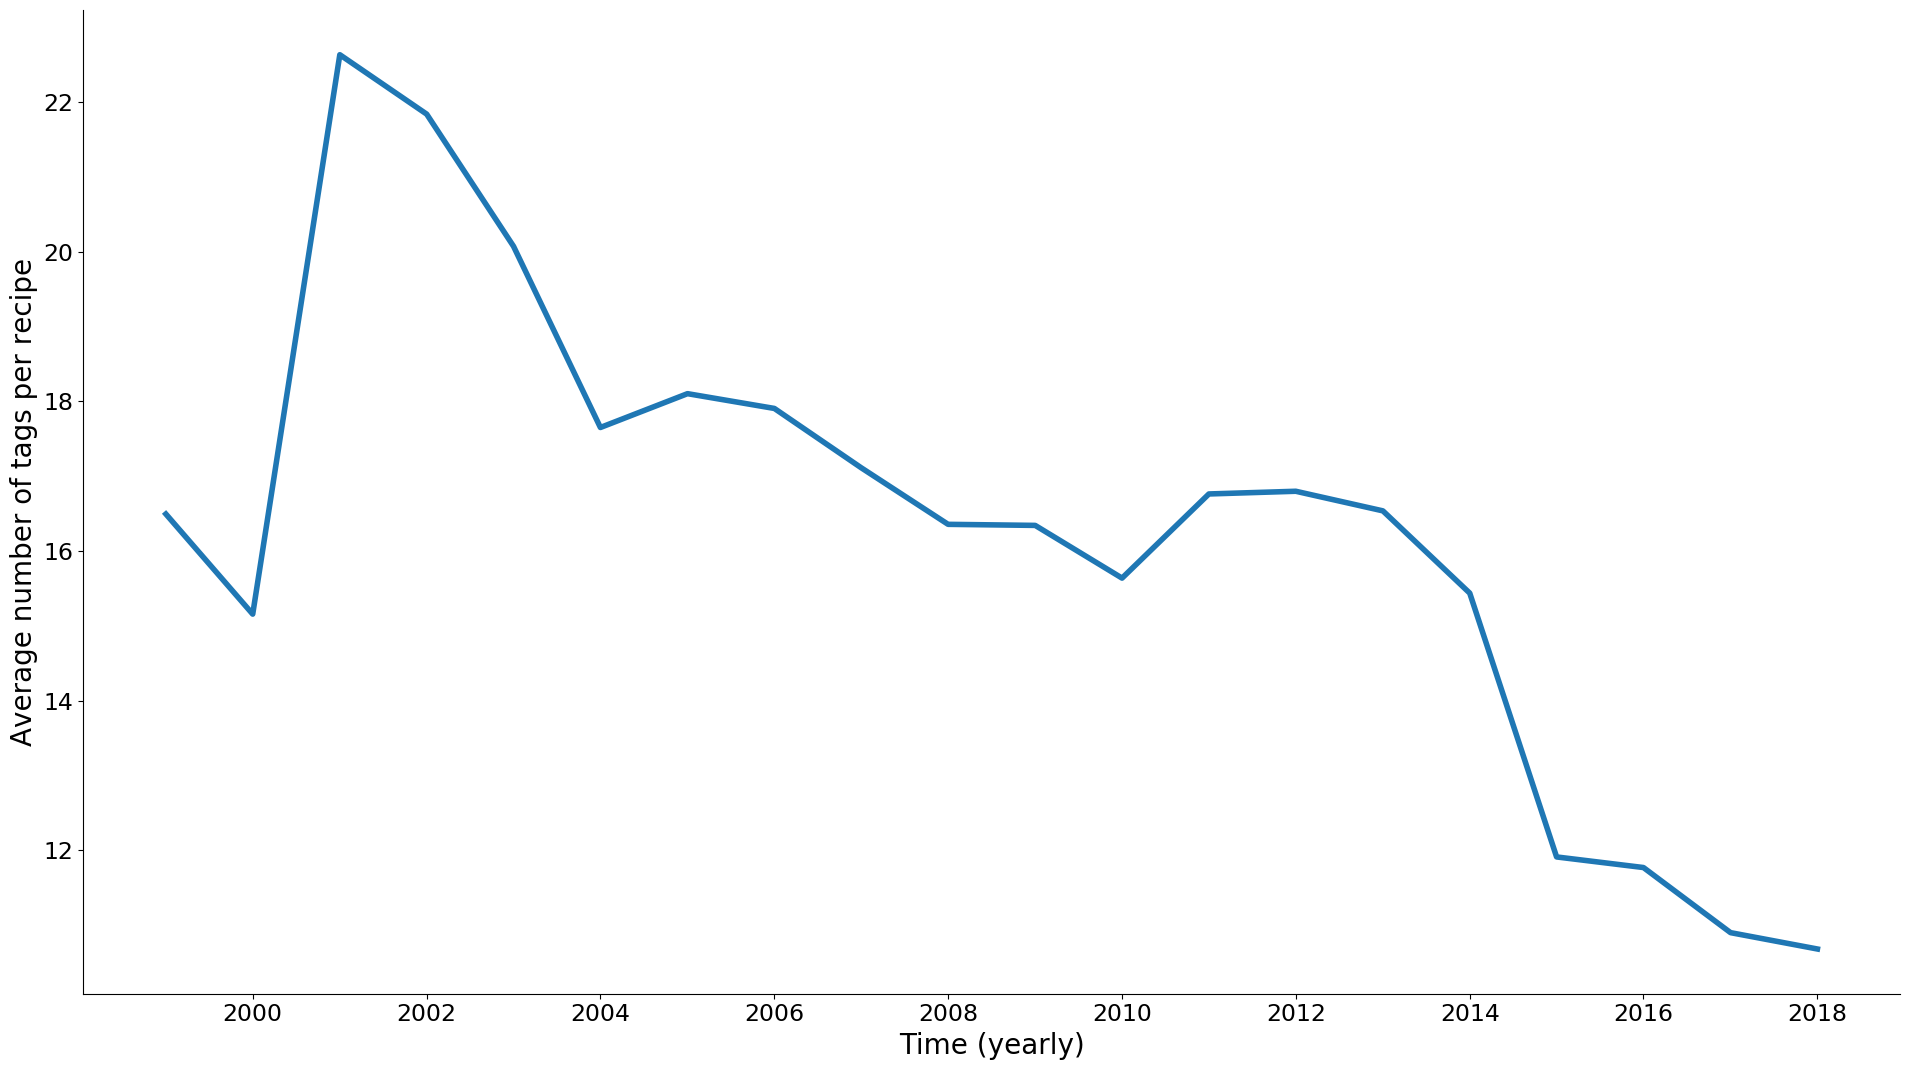

In [27]:
lo = df.copy()
lo['submitted'] = lo['submitted'].astype('datetime64[Y]')
lo = lo.groupby('submitted').mean()

fig, ax = plt.subplots(figsize = (19.2, 10.8))

ax.plot(lo.index, lo['tag_n'], lw=4)

#ax.set_title('Evolution of number of tags per recipe', fontsize=25)
ax.set_ylabel('Average number of tags per recipe', fontsize=20)
ax.set_xlabel('Time (yearly)', fontsize=20)

plt.xticks(fontsize=17)
plt.yticks(fontsize=17)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

fig.tight_layout()

fig.savefig('imgs/tags_per_recipe.png')

plt.show()

In [28]:
df['tags'].to_numpy()[:2]

array([list(['60-minutes-or-less', 'time-to-make', 'course', 'main-ingredient', 'cuisine', 'preparation', 'occasion', 'north-american', 'side-dishes', 'vegetables', 'mexican', 'easy', 'fall', 'holiday-event', 'vegetarian', 'winter', 'dietary', 'christmas', 'seasonal', 'squash']),
       list(['time-to-make', 'course', 'preparation', 'main-dish', 'chili', 'crock-pot-slow-cooker', 'dietary', 'equipment', '4-hours-or-less'])],
      dtype=object)

In [29]:
df.tags

137739    [60-minutes-or-less, time-to-make, course, mai...
112140    [time-to-make, course, preparation, main-dish,...
44061     [weeknight, time-to-make, course, main-ingredi...
5289      [15-minutes-or-less, time-to-make, course, mai...
25274     [15-minutes-or-less, time-to-make, course, mai...
                                ...                        
357451    [15-minutes-or-less, time-to-make, course, cui...
188810    [60-minutes-or-less, time-to-make, course, mai...
486161    [ham, 60-minutes-or-less, time-to-make, course...
493372    [15-minutes-or-less, time-to-make, course, pre...
308080    [60-minutes-or-less, time-to-make, course, mai...
Name: tags, Length: 156948, dtype: object

In [30]:
tags = [j for i in df.tags for j in i]

In [31]:
tags_dict = Counter(tags)

In [32]:
tags_dict.most_common(50)

[('preparation', 156536),
 ('time-to-make', 155473),
 ('course', 145054),
 ('main-ingredient', 118171),
 ('dietary', 110524),
 ('easy', 89755),
 ('occasion', 71146),
 ('cuisine', 64027),
 ('low-in-something', 60895),
 ('main-dish', 54364),
 ('60-minutes-or-less', 45526),
 ('vegetables', 43101),
 ('30-minutes-or-less', 42586),
 ('meat', 41465),
 ('15-minutes-or-less', 36761),
 ('3-steps-or-less', 36736),
 ('number-of-servings', 36234),
 ('low-carb', 34551),
 ('north-american', 31020),
 ('taste-mood', 30586),
 ('4-hours-or-less', 29923),
 ('low-calorie', 29889),
 ('healthy', 29765),
 ('equipment', 29578),
 ('low-cholesterol', 29333),
 ('low-sodium', 28768),
 ('vegetarian', 26143),
 ('low-saturated-fat', 25303),
 ('5-ingredients-or-less', 24590),
 ('beginner-cook', 24435),
 ('dinner-party', 23657),
 ('inexpensive', 22752),
 ('low-protein', 22502),
 ('side-dishes', 21891),
 ('healthy-2', 21617),
 ('pasta-rice-and-grains', 21076),
 ('for-1-or-2', 20102),
 ('american', 19290),
 ('poultry', 1

In [33]:
tags_dict.get('north-american')  # Biased towards low quality food

31020

In [34]:
# We will create dummies for these tags. For some of them, we are interested in True values, for others, in False
# healthy and healthy-2 will be combined
custom_tags = ['vegetarian', 'healthy', 'healthy-2', 'italian', 'beginner-cook', 'inexpensive', 'european']

In [35]:
df_tag = df.copy()[['submitted', 'tags', 'n_votes', 'avg_rating', 'std_rating']]

In [36]:
d_tags = df.tags.to_numpy()

for tag in custom_tags:
    dummy = np.array([tag in tags for i, tags in enumerate(d_tags)]).astype(int)
    df_tag[tag] = dummy

In [37]:
df_tag.healthy = df_tag.healthy.combine(df_tag['healthy-2'], func=max)
df_tag = df_tag.drop(columns='healthy-2')

In [38]:
df_tag = df_tag.drop(columns='tags')

In [39]:
df_tag

,submitted,n_votes,avg_rating,std_rating,vegetarian,healthy,italian,beginner-cook,inexpensive,european
137739,2005-09-16,3,5.0,0.0,1,0,0,0,0,0
112140,2005-02-25,1,4.0,0.0,0,0,0,0,0,0
44061,2002-10-25,1,5.0,0.0,1,0,0,0,0,0
5289,1999-12-06,2,5.0,0.0,0,0,0,0,0,0
25274,2002-04-14,1,2.0,0.0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
357451,2009-02-23,2,5.0,0.0,0,0,0,1,1,0
188810,2006-10-03,1,3.0,0.0,0,1,0,0,0,0
486161,2012-08-29,6,5.0,0.0,0,0,0,0,0,0
493372,2013-01-09,1,5.0,0.0,1,0,0,0,0,0


In [40]:
# Change dates to just represent the month
df_tag.submitted = df_tag.submitted.astype('datetime64[M]')

In [41]:
df_tag = df_tag[(df_tag['vegetarian']== 1)  | (df_tag['italian']== 1)  | (df_tag['healthy']== 1)  | (df_tag['beginner-cook'] == 1)  | (df_tag['inexpensive'] == 1)  | (df_tag['european']== 1)]

In [42]:
tags = ['vegetarian', 'italian',  'healthy', 'beginner-cook', 'inexpensive', 'european']

data = {tag: df_tag[df_tag[tag] == 1].submitted.value_counts() for tag in tags}
for k,v in data.items():
    data[k] = v.sort_index()

In [43]:
def sumseries(x, y):
    if np.isnan(x):
        return y
    elif np.isnan(y):
        return x
    else:
        return x+y

In [44]:
total = data['vegetarian']
for i, ele in enumerate(data):
    if i > 0:
        total = total.combine(data[ele], func=sumseries)

In [45]:
for tag, dic in data.items():
    data[tag] = pd.Series({k:v/total[k] for k, v in data[tag].items()})

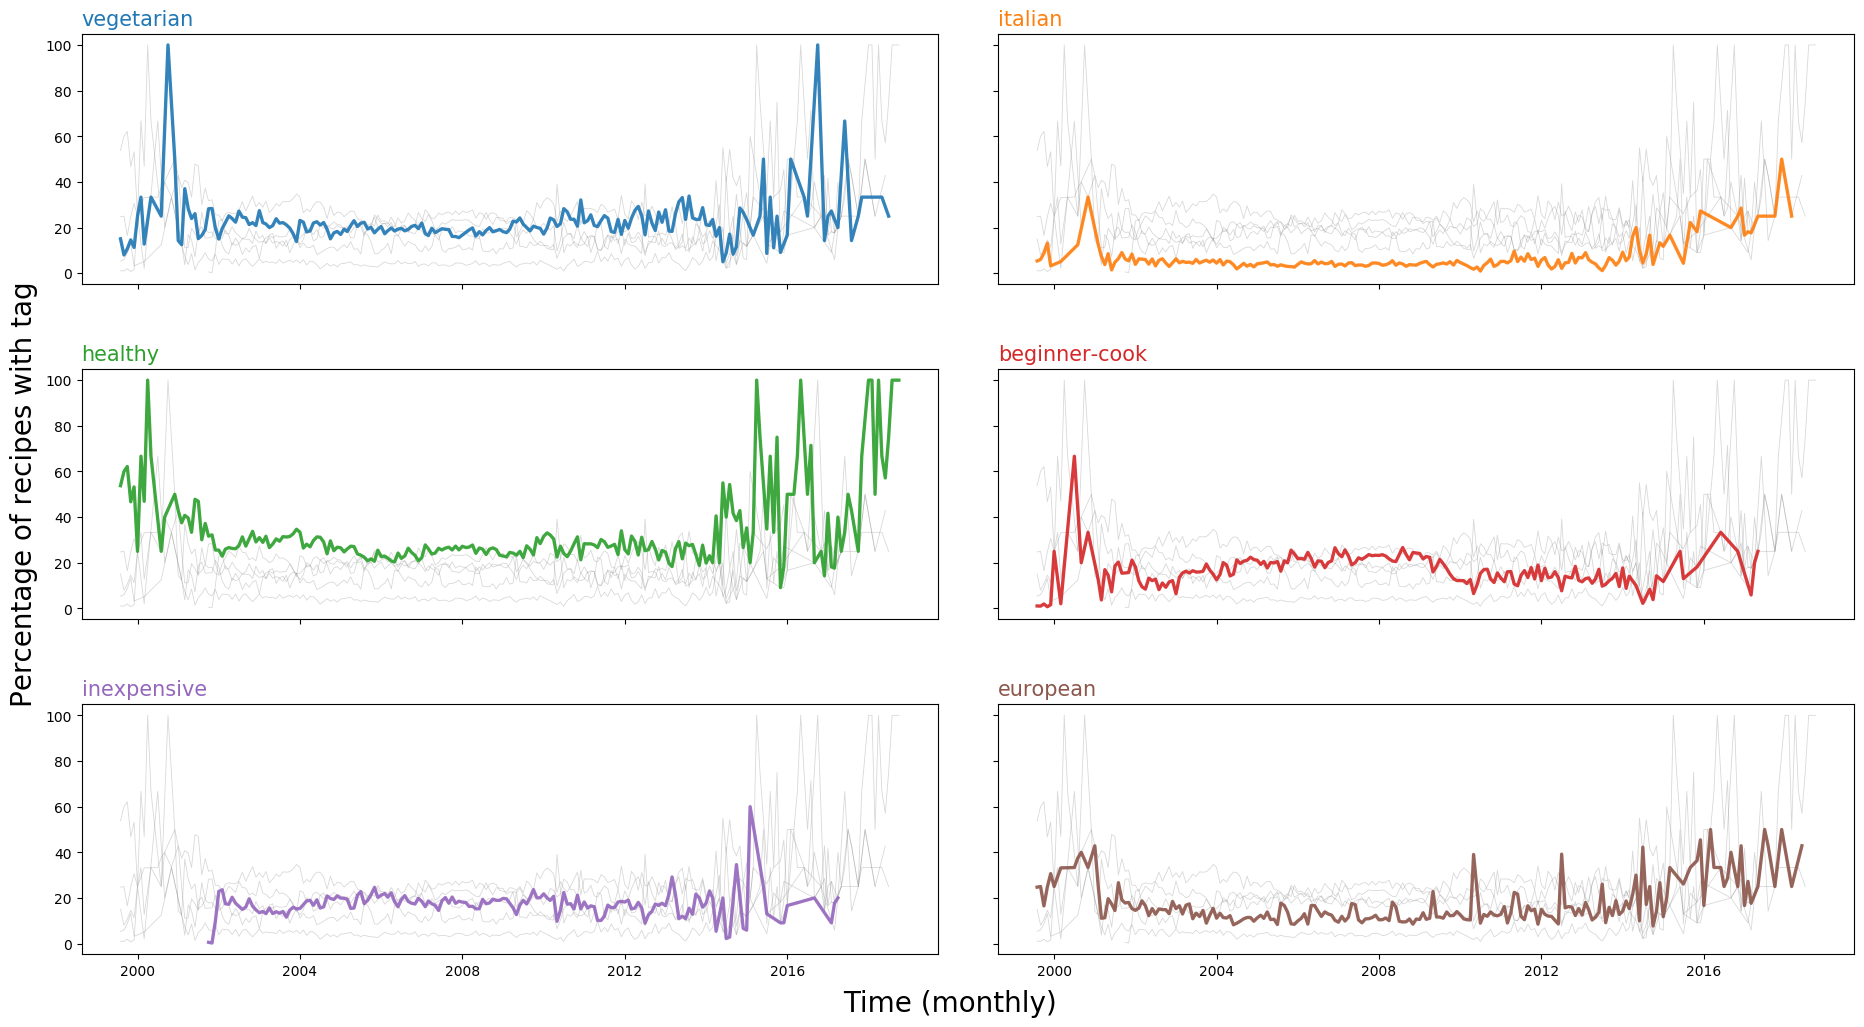

In [46]:
palette = plt.get_cmap('Set1')
fig, ax = plt.subplots(3, 2, figsize=(19.2, 10.8), sharex=True, sharey=True)
for i, ele in enumerate(data):
    j = i // 2
    k = i % 2
    for entry in data.keys():
        ax[j][k].plot(data[entry].index, data[entry].to_numpy()*100, marker='', color = 'grey', lw=0.6, alpha=0.3)
    ax[j][k].plot(data[ele].index, data[ele].to_numpy()*100, marker = '', color='C{}'.format(i), lw = 2.4, alpha = 0.9, label =ele)
    ax[j][k].set_title(ele, loc='left', fontsize=15, fontweight=0, color='C{}'.format(i))
    
#fig.suptitle('Evolution of tag frequency (yearly)', fontsize=25)    
    
fig.tight_layout(pad=4)

suplabel('x', 'Time (monthly)', {'fontsize':20})
suplabel('y', 'Percentage of recipes with tag', {'fontsize':20})

plt.savefig('imgs/tags_monthly.png')

plt.show()

### Tags Yearly ###

In [47]:
df_tag2 = df_tag.copy()
df_tag2.submitted = df_tag2.submitted.astype('datetime64[Y]')

In [48]:
data2 = {tag: df_tag2[df_tag2[tag] == 1].submitted.value_counts() for tag in tags}
for k,v in data2.items():
    data2[k] = v.sort_index()

In [49]:
#total = data2['vegetarian']
#for i, ele in enumerate(data2):
#    if i > 0:
#        total = total.combine(data2[ele], func=sumseries)

In [50]:
# Get number of monthly recipes
df_year = df.copy()
df_year.submitted = df_year.submitted.astype('datetime64[Y]')

In [51]:
total_dict = {k: v.shape[0] for k, v in df_year.groupby('submitted')}
total = pd.Series(total_dict)

In [52]:
data2

{'vegetarian': 1999-01-01      60
 2000-01-01      32
 2001-01-01     470
 2002-01-01    2122
 2003-01-01    1638
 2004-01-01    1492
 2005-01-01    2934
 2006-01-01    3401
 2007-01-01    3739
 2008-01-01    3338
 2009-01-01    2857
 2010-01-01    1615
 2011-01-01    1050
 2012-01-01     679
 2013-01-01     579
 2014-01-01      98
 2015-01-01      14
 2016-01-01       7
 2017-01-01      16
 2018-01-01       2
 Name: submitted, dtype: int64, 'italian': 1999-01-01     40
 2000-01-01     12
 2001-01-01    136
 2002-01-01    476
 2003-01-01    396
 2004-01-01    297
 2005-01-01    529
 2006-01-01    772
 2007-01-01    785
 2008-01-01    728
 2009-01-01    591
 2010-01-01    228
 2011-01-01    313
 2012-01-01    134
 2013-01-01     99
 2014-01-01     44
 2015-01-01     11
 2016-01-01      4
 2017-01-01     10
 2018-01-01      1
 Name: submitted, dtype: int64, 'healthy': 1999-01-01     271
 2000-01-01     103
 2001-01-01     675
 2002-01-01    2580
 2003-01-01    2330
 2004-01-01    2119
 2

In [53]:
for tag, dic in data2.items():
    data2[tag] = pd.Series({k:v/total[k] for k, v in data2[tag].items()})

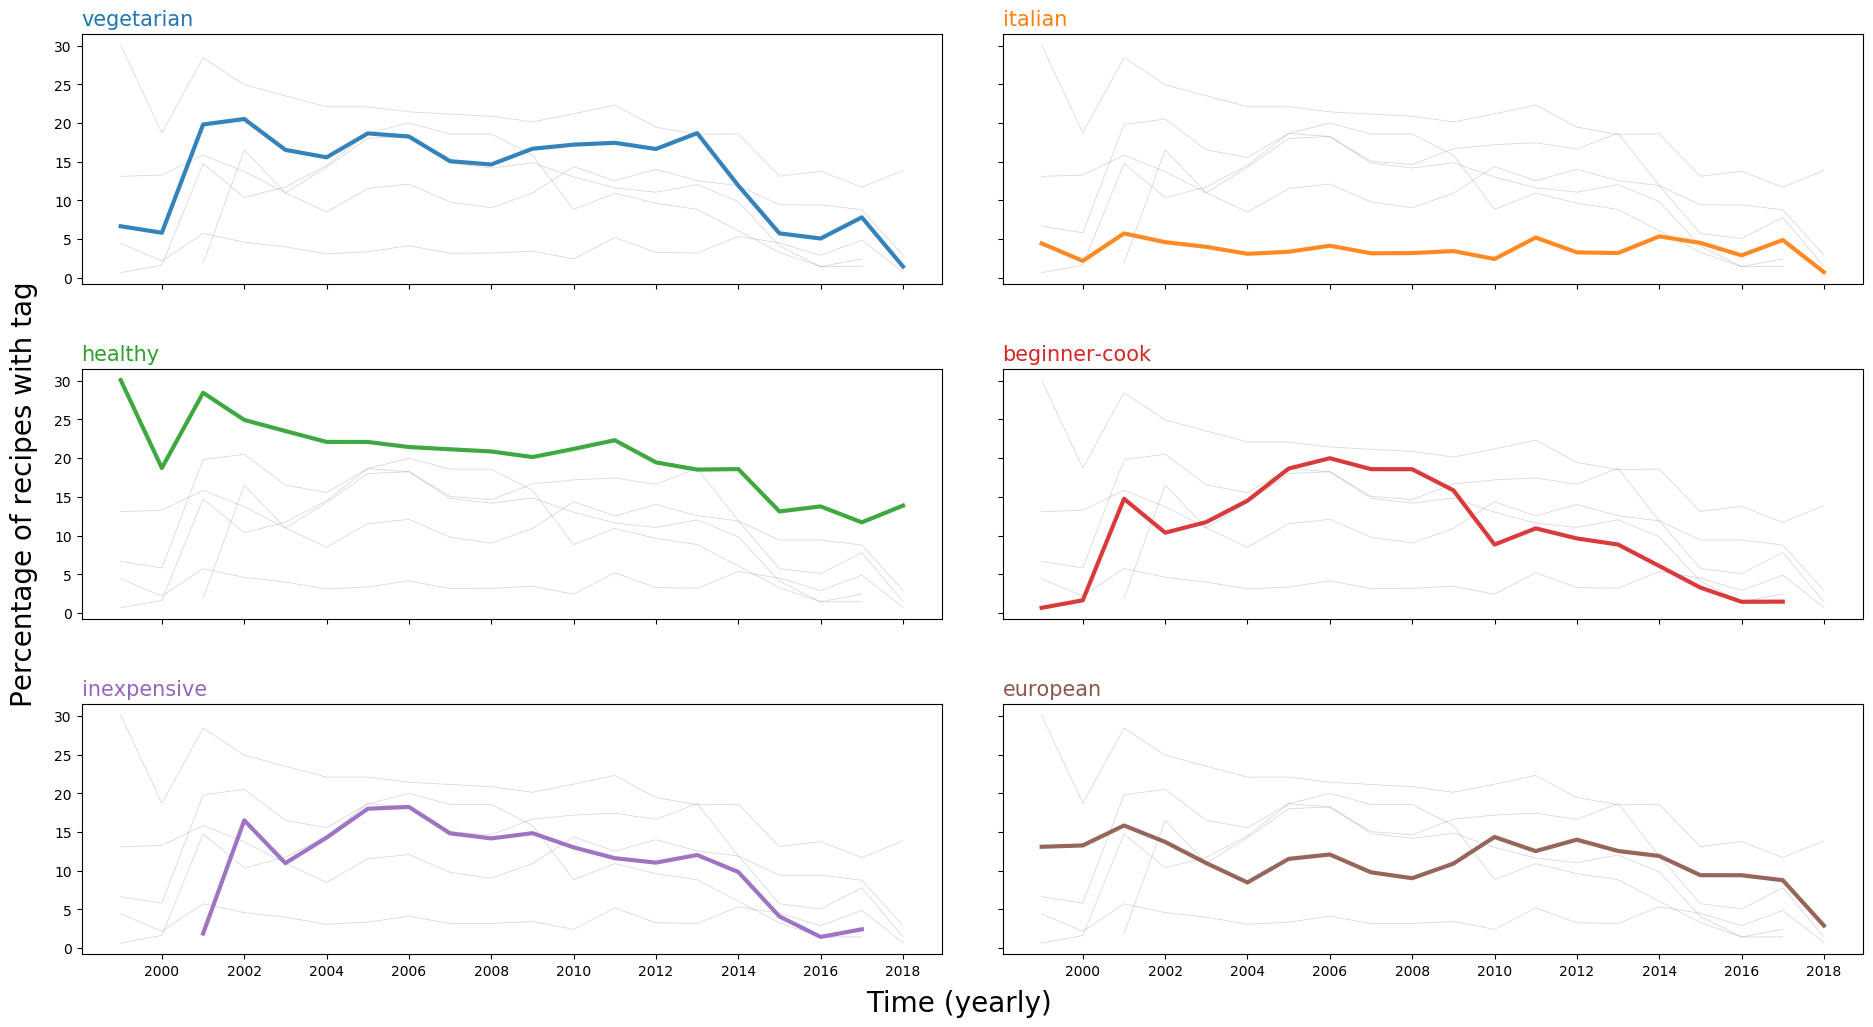

In [54]:
#plt.style.use('seaborn-darkgrid')
#palette = plt.get_cmap('Accent')
fig, ax = plt.subplots(3, 2, figsize=(19.2, 10.8), sharex=True, sharey=True)
for i, ele in enumerate(data2):
    j = i // 2
    k = i % 2
    for entry in data2.keys():
        ax[j][k].plot(data2[entry].index, data2[entry].to_numpy()*100, marker='', color = 'grey', lw=0.6, alpha=0.3)
    ax[j][k].plot(data2[ele].index, data2[ele].to_numpy()*100, marker = '', color='C{}'.format(i), lw = 3, alpha = 0.9, label =ele)
    ax[j][k].set_title(ele, loc='left', fontsize=15, fontweight=0, color='C{}'.format(i))

#fig.title('Evolution of tag frequency (monthly)')

fig.tight_layout(pad=4)

suplabel('x', 'Time (yearly)', {'fontsize':20})
suplabel('y', 'Percentage of recipes with tag', {'fontsize':20})


plt.savefig('imgs/tags_yearly.png')
plt.show()


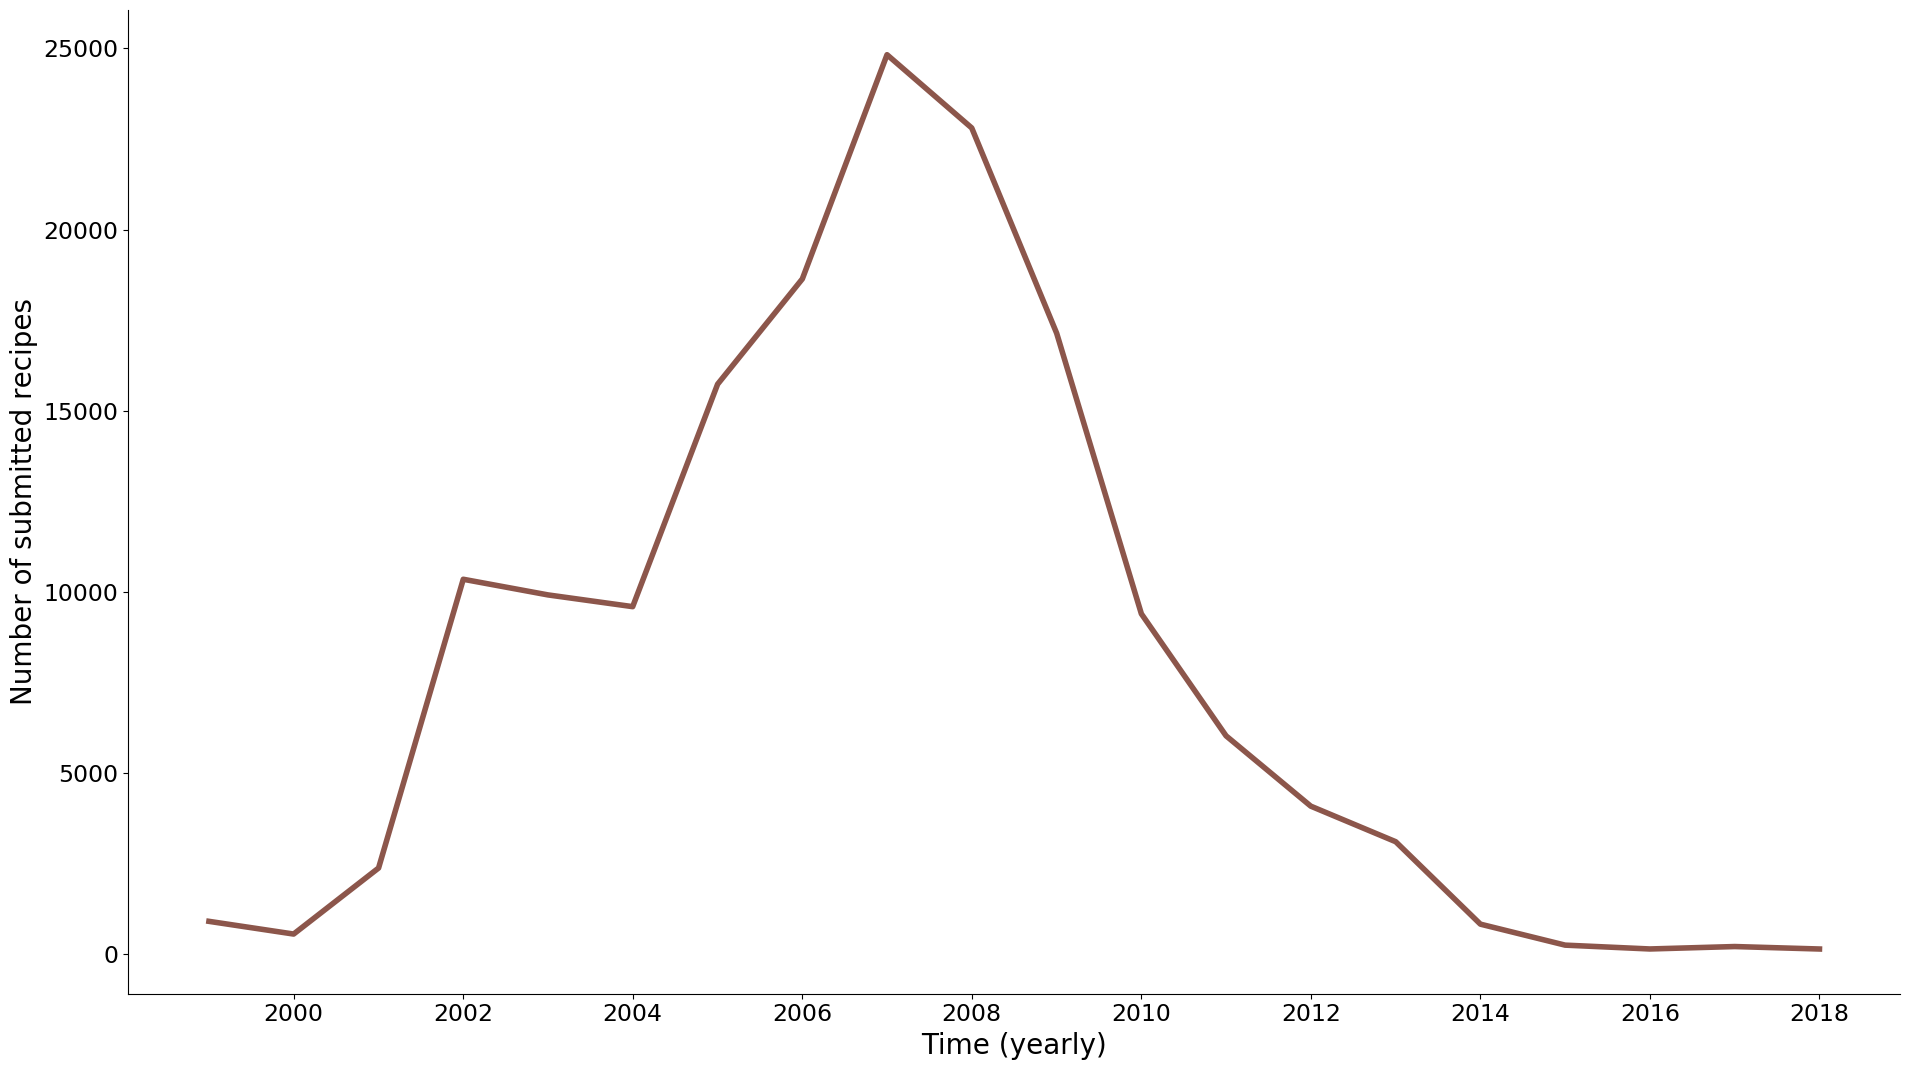

In [55]:
# Plotting yearly total

#palette = plt.get_cmap('Accent')
fig, ax = plt.subplots(figsize=(19.2, 10.8))

ax.plot(total.index, total.to_numpy(), marker = '', color='C{}'.format(i), lw = 4)
#plt.title('Total recipe counts')

ax.set_ylabel('Number of submitted recipes', fontsize=20)
ax.set_xlabel('Time (yearly)', fontsize=20)

plt.xticks(fontsize=17)
plt.yticks(fontsize=17)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)


fig.tight_layout()
fig.savefig('imgs/tags_yearly_total.png')
plt.show()

## Ingredients (vegetarian and healthy)##

In [56]:
index = (df_tag[(df_tag.vegetarian == 1) & (df_tag.healthy == 1)]).index
df_ing = df.loc[index]
df_ing

,name,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients,n_votes,avg_rating,std_rating,tag_n
81185,mock a mole low fat guacamole,15,67026,2004-01-15,"[15-minutes-or-less, time-to-make, course, mai...","[115.9, 7.0, 21.0, 19.0, 9.0, 3.0, 5.0]",7,[thaw peas by running hot water over them in a...,from crescent dragonwagon's,"[frozen peas, hass avocado, salt, lemons, juic...",7,4,4.750000,0.500000,27
30300,munch without guilt tomatoes,10,6164,2002-06-04,"[15-minutes-or-less, time-to-make, course, mai...","[3.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]",3,[put a slice of tomato on each biscuit / crack...,anytime munchies...another sweat free preparat...,"[tomatoes, crackers, mayonnaise, black pepper]",4,4,5.000000,0.000000,39
112959,sour cream avocado dip vegan,10,167849,2005-03-08,"[lactose, 15-minutes-or-less, time-to-make, co...","[12.8, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]",6,"[peel and pit avocado , put in a large mixing ...",i made this up when i had an avocado that was ...,"[soft silken tofu, avocado, chunky salsa, fres...",7,4,3.750000,2.500000,38
63793,tide me over indian chaat simple veggie salad,2,12657,2003-06-05,"[15-minutes-or-less, time-to-make, course, mai...","[73.1, 1.0, 15.0, 0.0, 5.0, 3.0, 4.0]",4,"[toss everything well in a serving bowl, grab ...",this version of the famous indian chaat (prono...,"[cucumber, potato, chopped tomato, plain yogur...",7,7,4.428571,0.786796,38
120297,middle eastern twice baked potatoes,110,197023,2005-05-02,"[time-to-make, course, main-ingredient, cuisin...","[327.6, 11.0, 16.0, 14.0, 21.0, 6.0, 18.0]",14,"[preheat the oven to 200c, wash the potatoes t...",a delicious yet low-fat twice-baked potato sid...,"[baking potatoes, olive oil, chickpeas, corian...",10,4,3.750000,0.957427,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97323,zucchini peppers and tomatoes,40,19166,2004-08-08,"[60-minutes-or-less, time-to-make, course, mai...","[135.8, 14.0, 28.0, 2.0, 5.0, 21.0, 3.0]",8,"[wash , trim , and slice zucchini, salt zucchi...","this is a really quick, simple, and flavorful ...","[zucchini, butter, olive oil, onion, bell pepp...",11,7,4.285714,1.889822,21
142932,zucchini pignoli and raisin salad,10,47892,2005-10-27,"[15-minutes-or-less, time-to-make, course, mai...","[251.8, 31.0, 48.0, 0.0, 7.0, 11.0, 5.0]",8,"[cut the zucchini into narrow strips, add to t...",from diane seed's mediterranean dishes. meant ...,"[zucchini, extra virgin olive oil, pine nuts, ...",9,1,5.000000,0.000000,19
413205,zucchini courgettes sauteed with sun dried to...,40,485109,2010-02-16,"[weeknight, 60-minutes-or-less, time-to-make, ...","[115.4, 7.0, 33.0, 6.0, 8.0, 3.0, 5.0]",12,[place the sundried tomatoes in the 3 / 4 cup ...,"this is a lovely mediterranean side dish, and ...","[sun-dried tomatoes, warm water, olive oil, on...",8,3,5.000000,0.000000,29
455000,zulu cabbage,40,1058097,2011-05-04,"[60-minutes-or-less, time-to-make, course, mai...","[94.0, 7.0, 25.0, 4.0, 4.0, 3.0, 4.0]",5,"[heat the oil in a large skillet, add onion an...",adapted from the african kitchen.,"[sunflower oil, onion, green bell pepper, head...",9,7,5.000000,0.000000,21


In [57]:
ingredients = [j for i in df_ing.ingredients for j in i]

In [58]:
ingredients_dict = Counter(ingredients)

In [59]:
ingredients_dict.most_common(50)

[('salt', 3406),
 ('olive oil', 2086),
 ('water', 1830),
 ('onion', 1449),
 ('garlic cloves', 1331),
 ('sugar', 1217),
 ('tomatoes', 907),
 ('garlic', 818),
 ('salt and pepper', 704),
 ('lemon juice', 690),
 ('pepper', 583),
 ('extra virgin olive oil', 564),
 ('butter', 554),
 ('garlic clove', 544),
 ('black pepper', 532),
 ('vegetable oil', 493),
 ('honey', 456),
 ('ground cumin', 449),
 ('carrots', 437),
 ('red onion', 436),
 ('oil', 410),
 ('zucchini', 404),
 ('carrot', 399),
 ('fresh cilantro', 395),
 ('onions', 390),
 ('parmesan cheese', 363),
 ('cinnamon', 363),
 ('fresh parsley', 363),
 ('potatoes', 355),
 ('brown sugar', 352),
 ('flour', 346),
 ('milk', 344),
 ('cumin', 325),
 ('baking powder', 321),
 ('fresh lemon juice', 311),
 ('soy sauce', 304),
 ('chili powder', 304),
 ('cilantro', 303),
 ('celery', 303),
 ('fresh ground black pepper', 296),
 ('black beans', 291),
 ('red bell pepper', 291),
 ('chickpeas', 277),
 ('parsley', 275),
 ('orange juice', 270),
 ('cayenne pepper',

In [60]:
# We will use not = to filter, but contains, so that garlic cloves and garlic clove are grouped, and so on...
ing_custom = ['onion', 'garlic', 'tomato', 'cheese', 'egg', 'carrot']

In [61]:
d_ings = df_ing.ingredients.to_numpy()

for ing in ing_custom:
    dummy = np.array([np.array([ing in ingr for ingr in ings]).any() for ings in d_ings]).astype(int)
    df_ing[ing] = dummy

In [62]:
df_ing.submitted = df_ing.submitted.astype('datetime64[Y]')

In [63]:
data = {ing: df_ing[df_ing[ing] == 1].submitted.value_counts() for ing in ing_custom}
for k,v in data.items():
    data[k] = v.sort_index()

In [64]:
for ing, dic in data.items():
    data[ing] = pd.Series({k:v/total[k] for k, v in data[ing].items()})

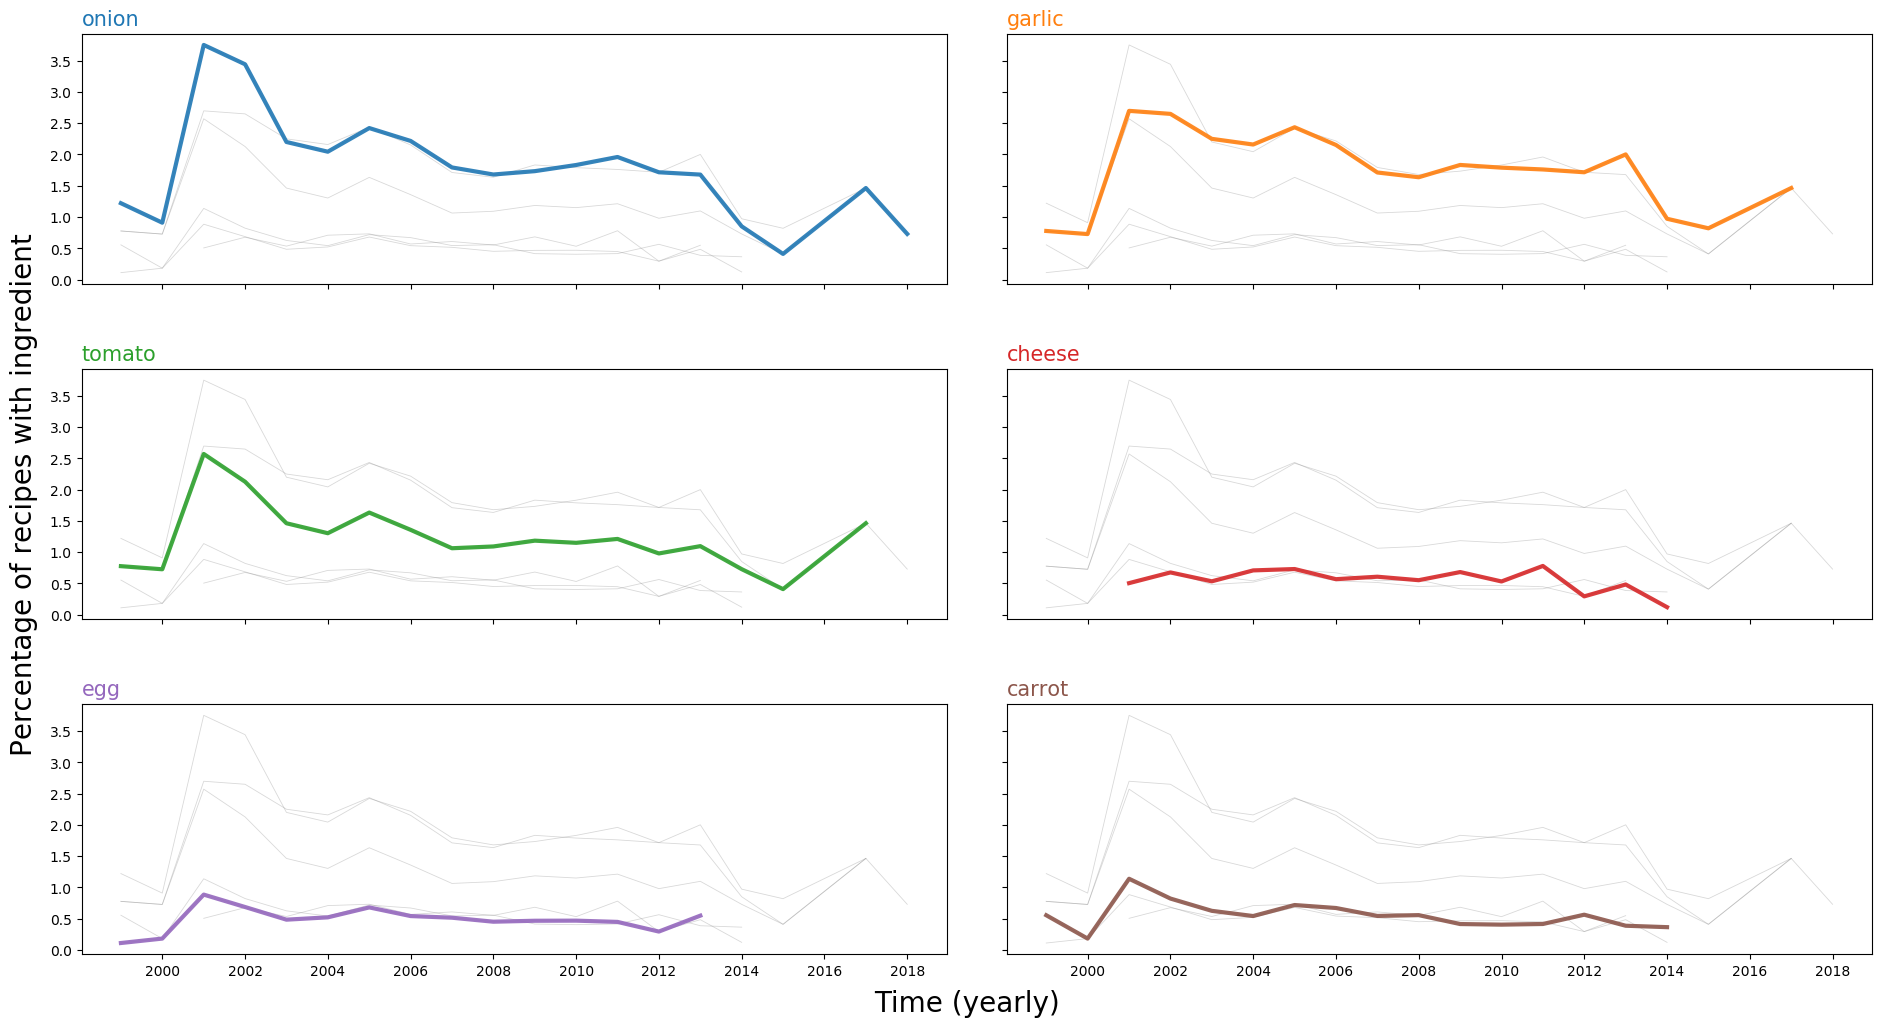

In [65]:
#plt.style.use('seaborn-darkgrid')

#palette = plt.get_cmap('Accent')
fig, ax = plt.subplots(3, 2, figsize=(19.2, 10.8), sharex=True, sharey=True)
for i, ele in enumerate(data):
    j = i // 2
    k = i % 2
    for entry in data.keys():
        ax[j][k].plot(data[entry].index, data[entry].to_numpy()*100, marker='', color = 'grey', lw=0.6, alpha=0.3)
    ax[j][k].plot(data[ele].index, data[ele].to_numpy()*100, marker = '', color='C{}'.format(i), lw = 3, alpha = 0.9, label =ele)
    ax[j][k].set_title(ele, loc='left', fontsize=15, fontweight=0, color='C{}'.format(i))

fig.tight_layout(pad=4)

#plt.title('Ingredient evolution for healthy and vegetarian recipes')

suplabel('x', 'Time (yearly)', {'fontsize':20})
suplabel('y', 'Percentage of recipes with ingredient', {'fontsize':20})

plt.savefig('imgs/ing_yearly.png')
plt.show()

In [66]:
for i in df_ing.ingredients:
    print(i)
df_ing

['frozen peas', 'hass avocado', 'salt', 'lemons, juice of', 'tomatoes', 'onion', 'cilantro']
['tomatoes', 'crackers', 'mayonnaise', 'black pepper']
['soft silken tofu', 'avocado', 'chunky salsa', 'fresh cilantro', 'lime juice', 'hot sauce', 'salt and pepper']
['cucumber', 'potato', 'chopped tomato', 'plain yogurt', 'chat masala', 'paprika', 'salt']
['baking potatoes', 'olive oil', 'chickpeas', 'coriander', 'ground cumin', 'fresh coriander', 'garlic cloves', 'low-fat yogurt', 'tahini', 'salt & freshly ground black pepper']
['rice vinegar', 'maple syrup', 'soy sauce', 'sesame oil', 'gingerroot', 'green cabbage', 'red cabbage', 'carrot', 'green onion', 'apple']
['ghee', 'kidney beans', 'onion', 'garlic clove', 'carrot', 'potatoes', 'garam masala', 'curry powder', 'tabasco sauce', 'salt and pepper', 'water']
['black beans', 'oil', 'frozen corn', 'garlic', 'onion', 'cumin', 'green chili sauce', 'salsa', 'chili powder', 'flour', 'dry breadcrumbs']
['plain tomato juice', 'old bay seasoning']


['sweet apples', 'sugar', 'maple syrup', 'ground cinnamon', 'salt', 'fresh cranberries', 'lemon juice']
['whole wheat flour', 'oats', 'oat bran', 'cinnamon', 'baking powder', 'salt', 'raisins', 'apple', 'apple juice']
['tomatoes', 'cucumber', 'garlic clove', 'green pepper', 'onion', 'tomato juice', 'vegetable cocktail', 'olive oil', 'lemon juice', 'salt', 'garlic-flavored croutons']
['red bell pepper', 'cucumber', 'tomatoes', 'scallion', 'marinated artichoke hearts', 'salt', 'pepper']
['marmalade', 'orange juice concentrate', 'golden raisin', 'dried cranberries', 'cinnamon stick', 'fresh cranberries']
['tomatoes', 'stewed tomatoes', 'avocados', 'scallion', 'garlic cloves', 'lime juice', 'cilantro', 'black olives', 'hot sauce']
['tomatillos', 'red bell pepper', 'red onion', 'fresh cilantro', 'plum tomato', 'jalapenos', 'fresh lime juice', 'sugar', 'garlic cloves', 'salt', 'pepper']
['tomatillo', 'serrano chili', 'green chili', 'garlic cloves', 'onion', 'water', 'salt', 'lime juice']
['w

['eggplants', 'vegetable oil', 'sweet white onion', 'green bell pepper', 'garlic cloves', 'lemon juice', 'sweet paprika', 'fresh black pepper', 'salt', 'sugar']
['olive oil', 'onion', 'garlic clove', 'pumpkin', 'sweet potatoes', 'water', 'milk', 'cream', 'breadsticks']
['water', 'butter', 'sugar', 'salt', 'bread flour', 'dry milk', 'instant yeast']
['mayonnaise', 'garlic clove', 'paprika', 'fresh lemon juice', 'flat leaf parsley', 'kosher salt & freshly ground black pepper', 'vegetable oil', 'baking potatoes']
['celery ribs', 'red onion', 'carrot', 'tomatoes', 'yellow mustard', 'miracle whip light', 'red wine vinegar']
['active dry yeast', 'warm water', 'sugar', 'egg', 'unbleached all-purpose flour', 'salt', 'cold water', 'honey', 'lemon juice', 'vegetable oil', 'ground cinnamon']
['avocado', 'mild salsa', 'lime juice', 'cilantro', 'garlic clove', 'cumin', 'tomatoes']
['chickpeas', 'tahini', 'fresh lemon juice', 'oil', 'extra virgin olive oil', 'garlic cloves', 'cumin powder', 'salt', 

['tomato puree', 'water', 'sugar', 'olive oil', 'lemon juice', 'salt', 'oregano', 'basil', 'thyme', 'garlic powder']
['potatoes', 'olive oil', 'onion', 'tomatoes', 'salt', 'pepper', 'cream', 'muenster cheese']
['onion', 'jalapenos', 'garlic', 'vegetable oil', 'potatoes', 'tomato sauce', 'green chilies', 'cornstarch', 'water']
['papaya', 'mangoes', 'sugar', 'fresh lime juice']
['papayas', 'banana', 'kiwi', 'strawberry', 'mandarin oranges', 'vanilla yogurt', 'honey', 'of fresh mint', 'almond granola']
['papaya', 'evaporated milk', 'sweetened condensed milk', 'cinnamon', 'ice']
['papaya', 'peach nectar', 'lime, juice of', 'ice']
['plain yogurt', 'honey', 'banana', 'orange juice', 'papaya']
['garlic', 'onion', 'olive oil', 'red chili pepper', 'plum tomatoes', 'stale bread', 'broth', 'basil', 'parmesan cheese', 'extra virgin olive oil']
['extra virgin olive oil', 'garlic cloves', 'red pepper flakes', 'whole tomatoes', 'salt and black pepper', 'water', 'bread', 'fresh basil leaves']
['pappar

['fresh corn', 'plum tomatoes', 'red onion', 'fresh cilantro', 'extra virgin olive oil', 'red wine vinegar', 'salt', 'pepper']
['cornmeal', 'all-purpose flour', 'dark brown sugar', 'baking powder', 'baking soda', 'table salt', 'ground cinnamon', 'egg substitute', 'apple juice', 'apple cider vinegar', 'canola oil', 'frozen corn kernels']
['fresh corn', 'hot water', 'sugar', 'butter', 'salt']
['corn oil', 'cumin', 'fresh ginger', 'powdered ginger', 'tomatoes', 'salt', 'garlic powder', 'curry powder', 'scallions', 'maple syrup', 'frozen corn kernels', 'pepper']
['all-purpose flour', 'sugar', 'salt', 'active dry yeast', 'warm water', 'milk', 'butter', 'honey', 'eggs']
['orange', 'apple', 'carrot', 'grapefruit', 'pears']
['jicama', 'red onion', 'jalapeno peppers', 'fresh lemon rind', 'fresh lemon juice', 'sugar', 'fresh cilantro', 'canola oil', 'salt', 'pepper']
['pasta', 'canned pineapple', 'cheese']
['elbow macaroni', 'cottage cheese', 'sugar', 'cinnamon']
['cooked macaroni', 'green peppe

,name,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,...,n_votes,avg_rating,std_rating,tag_n,onion,garlic,tomato,cheese,egg,carrot
81185,mock a mole low fat guacamole,15,67026,2004-01-01,"[15-minutes-or-less, time-to-make, course, mai...","[115.9, 7.0, 21.0, 19.0, 9.0, 3.0, 5.0]",7,[thaw peas by running hot water over them in a...,from crescent dragonwagon's,"[frozen peas, hass avocado, salt, lemons, juic...",...,4,4.750000,0.500000,27,1,0,1,0,0,0
30300,munch without guilt tomatoes,10,6164,2002-01-01,"[15-minutes-or-less, time-to-make, course, mai...","[3.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]",3,[put a slice of tomato on each biscuit / crack...,anytime munchies...another sweat free preparat...,"[tomatoes, crackers, mayonnaise, black pepper]",...,4,5.000000,0.000000,39,0,0,1,0,0,0
112959,sour cream avocado dip vegan,10,167849,2005-01-01,"[lactose, 15-minutes-or-less, time-to-make, co...","[12.8, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]",6,"[peel and pit avocado , put in a large mixing ...",i made this up when i had an avocado that was ...,"[soft silken tofu, avocado, chunky salsa, fres...",...,4,3.750000,2.500000,38,0,0,0,0,0,0
63793,tide me over indian chaat simple veggie salad,2,12657,2003-01-01,"[15-minutes-or-less, time-to-make, course, mai...","[73.1, 1.0, 15.0, 0.0, 5.0, 3.0, 4.0]",4,"[toss everything well in a serving bowl, grab ...",this version of the famous indian chaat (prono...,"[cucumber, potato, chopped tomato, plain yogur...",...,7,4.428571,0.786796,38,0,0,1,0,0,0
120297,middle eastern twice baked potatoes,110,197023,2005-01-01,"[time-to-make, course, main-ingredient, cuisin...","[327.6, 11.0, 16.0, 14.0, 21.0, 6.0, 18.0]",14,"[preheat the oven to 200c, wash the potatoes t...",a delicious yet low-fat twice-baked potato sid...,"[baking potatoes, olive oil, chickpeas, corian...",...,4,3.750000,0.957427,24,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97323,zucchini peppers and tomatoes,40,19166,2004-01-01,"[60-minutes-or-less, time-to-make, course, mai...","[135.8, 14.0, 28.0, 2.0, 5.0, 21.0, 3.0]",8,"[wash , trim , and slice zucchini, salt zucchi...","this is a really quick, simple, and flavorful ...","[zucchini, butter, olive oil, onion, bell pepp...",...,7,4.285714,1.889822,21,1,0,1,1,0,0
142932,zucchini pignoli and raisin salad,10,47892,2005-01-01,"[15-minutes-or-less, time-to-make, course, mai...","[251.8, 31.0, 48.0, 0.0, 7.0, 11.0, 5.0]",8,"[cut the zucchini into narrow strips, add to t...",from diane seed's mediterranean dishes. meant ...,"[zucchini, extra virgin olive oil, pine nuts, ...",...,1,5.000000,0.000000,19,0,1,0,0,0,0
413205,zucchini courgettes sauteed with sun dried to...,40,485109,2010-01-01,"[weeknight, 60-minutes-or-less, time-to-make, ...","[115.4, 7.0, 33.0, 6.0, 8.0, 3.0, 5.0]",12,[place the sundried tomatoes in the 3 / 4 cup ...,"this is a lovely mediterranean side dish, and ...","[sun-dried tomatoes, warm water, olive oil, on...",...,3,5.000000,0.000000,29,1,1,1,1,0,0
455000,zulu cabbage,40,1058097,2011-01-01,"[60-minutes-or-less, time-to-make, course, mai...","[94.0, 7.0, 25.0, 4.0, 4.0, 3.0, 4.0]",5,"[heat the oil in a large skillet, add onion an...",adapted from the african kitchen.,"[sunflower oil, onion, green bell pepper, head...",...,7,5.000000,0.000000,21,1,0,1,0,0,0


# Ingredients controversy

In [ ]:
st_ing = {k:df_ing[df_ing[k]==1]['std_rating'].mean() for k in ing_custom }
rating_ing = {k:df_ing[df_ing[k]==1]['avg_rating'].mean() for k in ing_custom }
n_ing = {k:df_ing[df_ing[k]==1]['n_votes'].mean() for k in ing_custom }

In [ ]:
df.shape

In [ ]:
plt.scatter(df_ing['n_steps'], df_ing['avg_rating'])

In [ ]:
dlen = []
for i in df['description']:
    if i:
        dlen.append(len(i.split(' ')))
    else:
        dlen.append(0)
df['dlen'] = dlen

In [ ]:
dname = []
for i in df['name']:
    if i:
        dname.append(len(i.split(' ')))
    else:
        dname.append(0)
df['dname'] = dname

In [ ]:
print('nIngredients:', df[(df['avg_rating'] > 4.5) & (df['n_votes'] > 50)]['n_ingredients'].median())
print('Minutes:', df[(df['avg_rating'] > 4.5) & (df['n_votes'] > 50)]['minutes'].median())
print('nSteps:', df[(df['avg_rating'] > 4.5) & (df['n_votes'] > 50)]['n_steps'].median())
print('Desc length:', df[(df['avg_rating'] > 4.5) & (df['n_votes'] > 50)]['dlen'].median())
print('Name length:', df[(df['avg_rating'] > 4.5) & (df['n_votes'] > 50)]['dname'].median())

In [ ]:
plt.scatter(df['dlen'], df['avg_rating'])

In [ ]:
#plt.scatter(df_ing['dlen'], df_ing['avg_rating'])

# Overall name for healthy + vegetarian

In [ ]:
irr = ['s', 'with', 'and', 'the', 'for']

In [ ]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import PorterStemmer
from wordcloud import WordCloud

def generate_wordcloud(name, series=None, freq=None, irrelevant_words=[], bg='white') -> Counter:
    """Plot wordcloud given series of text.
    
    :param name: name of the figure to save
    :param series: the pd.Series of text
    :param freq: the dictionary of frequencies
    :param irrelevant_words: list of words to exclude
    :param bg: the background color for the cloud
    :return: a collections.Counter of every word
    """
    lo = None
    if series is not None:
        lucastemmer = PorterStemmer()
        text = [lucastemmer.stem(term) for term in word_tokenize(series.str.cat(sep=' '))]
        lo = Counter(text)
        irr = ['s', 'with', 'and']
        lo = {k:v for k,v in lo.items() if k not in irrelevant_words}
    else:
        lo = freq
    
    # Plot
    wordcloud = WordCloud(width = 1920, height = 1080, 
                background_color = bg, 
                stopwords = [' ', '  '], 
                min_font_size = 10).generate_from_frequencies(lo) 

    # plot the WordCloud image
    plt.figure(figsize = (19.2, 10.8), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0)
    plt.savefig('imgs/{}.png'.format(name))

    plt.show()
    
    return lo

# Most controversial ingredient (STD per ingredient)

In [ ]:
df_con = df.copy()
df_con['ing_text'] = df_con.ingredients.apply(lambda x: ' '.join(['_'.join(ing.split(' ')) for ing in x]))

In [ ]:
desc = df_con.std_rating.describe()
desc

In [ ]:
low_size = df_con[df_con.std_rating <= desc['mean']].shape[0]
lo_low = generate_wordcloud('lalala', df_con[df_con.std_rating <= desc['mean']].ing_text, None, irr)

In [ ]:
high_size = df_con[df_con.std_rating >= desc['75%']].shape[0]
lo_high = generate_wordcloud('lalala', df_con[df_con.std_rating >= desc['75%']].ing_text, None, irr)

In [ ]:
set(list(lo_low.keys()) + list(lo_high.keys()))

In [ ]:
# Difference between average in high and average in low
lo_diff = {k: - lo_high.get(k, 0)/high_size + lo_low.get(k, 0)/low_size for k in set(list(lo_low.keys()) + list(lo_high.keys()))}

In [ ]:
lo_diff = dict(sorted(lo_diff.items(), key=lambda kv: kv[1]))

In [ ]:
lo_diff

In [ ]:
lo_diff2 = dict(sorted(lo_diff.items(), key=lambda kv: kv[1], reverse=True))

In [ ]:
lo_diff2

In [ ]:
lo_diff_cloud_good = generate_wordcloud('std_low', None, lo_diff2, irr)

In [ ]:
lo_diff_cloud_bad = generate_wordcloud('std_high', None, {k:-v for k, v in lo_diff2.items()}, irr)

# BULLSHIT

In [ ]:
index = (df_tag[(df_tag.vegetarian == 1) & (df_tag.inexpensive == 1)]).index
df_interesting = df.loc[index]

In [ ]:
tags = [j for i in df_interesting.tags for j in i]

In [ ]:
tags_dict = Counter(tags)

In [ ]:
tags_dict.most_common(50)

In [ ]:
df_interesting

In [ ]:
df_ing[(df_ing.onion == 1) & (df_ing.submitted == np.datetime64('2002'))].shape[0] / df[df.submitted.astype('datetime64[Y]') == np.datetime64('2002')].shape[0]

In [ ]:
total_dict

In [ ]:
df[df.submitted.astype('datetime64[Y]') == np.datetime64('2018')].shape[0]